# Introduction

## **Datos:**
- Categóricos:
    - Números finitos de grupos o categorías
    - Categorías fijas o ya conocidas (color de ojos, de pelo, etc.)
    - Conocido como datos cualitativos
- Numericos:
    - Conocido como datos cuantitativos
    - Se expresan valores numericos
    - Suele ser una medida (altura, peso, etc.)
  
## **Datos Categóricos:**

- Ordinal
    - Tienen un orden natural (Encuesta de satisfacción)
- Nominal
    - No tienen orden natural (Genero)

## Importaciones

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [6]:
adult = pd.read_csv("data/adult.csv")
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
counts = adult['Marital Status'].value_counts(normalize = True)
counts

Marital Status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: proportion, dtype: float64

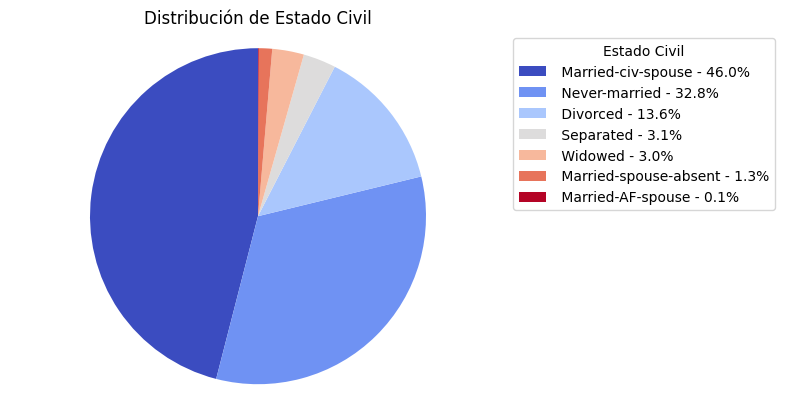

In [31]:
labels_legend = [f'{i} - {v:.1%}' for i, v in zip(counts.index, counts)]
mis_colores = cm.coolwarm(np.linspace(0, 1, len(counts)))
patches, texts = plt.pie(counts, labels=None, startangle=90, colors=mis_colores)

plt.legend(patches, labels_legend, title="Estado Civil", bbox_to_anchor=(1, 1))
plt.title('Distribución de Estado Civil')
plt.axis('equal') 
plt.show()

# Datos categóricos en pandas

In [36]:
adult['Marital Status'] = adult['Marital Status'].astype('category')
adult['Marital Status'].dtypes

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False, categories_dtype=object)

# Crear Series categóricas 

In [37]:
my_data = ['A', 'B', 'C', 'A','B','C','A','C','B','A']

my_serie1 = pd.Series(my_data, dtype="category")

my_serie1

0    A
1    B
2    C
3    A
4    B
5    C
6    A
7    C
8    B
9    A
dtype: category
Categories (3, object): ['A', 'B', 'C']

In [38]:
my_serie2 = pd.Categorical(my_data, categories = ['C','B','A'], ordered = True)

my_serie2

['A', 'B', 'C', 'A', 'B', 'C', 'A', 'C', 'B', 'A']
Categories (3, object): ['C' < 'B' < 'A']

Almacenar datos en categóricos ahorra mucha memoria. Abajo un ejemplo:

In [40]:
adults = pd.read_csv("data/adult.csv")

adult['Marital Status'].nbytes, adults['Marital Status'].nbytes

(32617, 260488)

Si conocemos los tipos de datos del DF es bueno hacer esto:

In [ ]:
adult_dtypes = {
    'Marital Status': 'category',
    "Workclass": "category",
    "Education": "category",
    "Relationship": "category",
    "Above/Below 50k": "category" 
}

adulto = pd.read_csv("data/adult.csv", dtype=adult_dtypes)
adulto['Marital Status'].dtypes

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False, categories_dtype=object)